<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85/13_DFS(240814).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DFS 예제

In [ ]:
# 0) 탐색을 지도에서 해야하므로 지도를 코드화!!!!
#    ==> 인접리스트 방식 리스트 자료형으로 구현!!!!!
#    --> 0번 도시를 가상으로 생성해서 추가!!!!!
#    --> 단순히 연결에 대한 정보만!!!거리 X
graph_list = [
    [], #<--가상의 0번 도시으므로 연결이 없음 : 인덱스 더미 처리용
    [2,3,8], # <--- 1번 도시의 연결
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]
graph_list

[[], [2, 3, 8], [1, 7], [1, 4, 5], [3, 5], [3, 4], [7], [2, 6, 8], [1, 7]]

In [ ]:
# --> 3번 도시의 연결은 어디인가요?
graph_list[3]

[1, 4, 5]

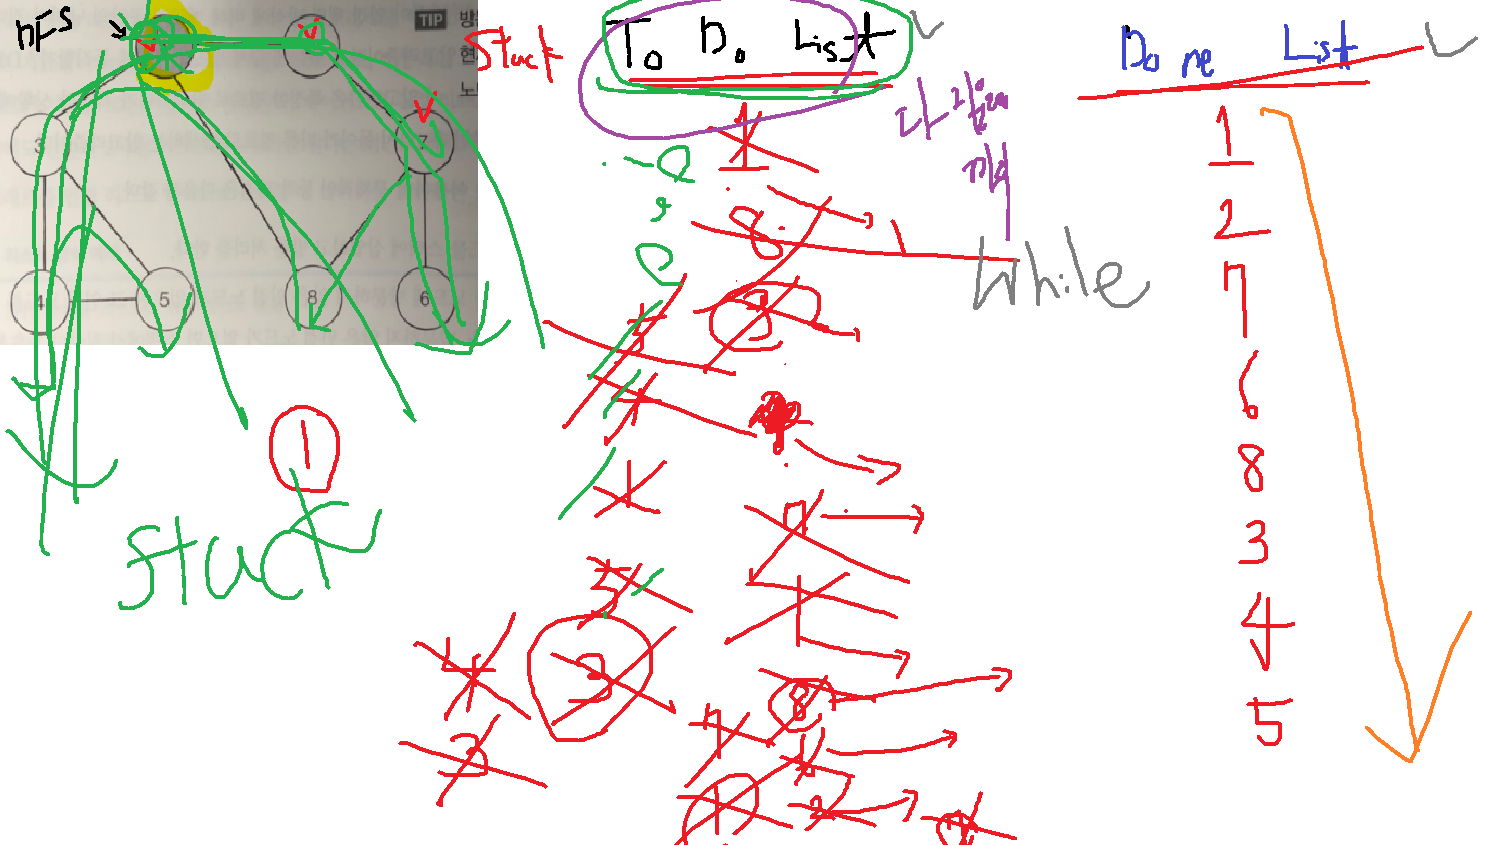

In [ ]:
# 탐색에 대한 DFS함수
# 입력 : 지도, 시작점
#       -- 필요한 변수 세팅 : 방문할 곳 리스트 : To Do List
#       -- 필요한 변수 세팅 : 방문한 곳 리스트 : Done List
#       ===> 시작점을 To Do List
# 사무실에서 나와서 출발!!!!!
# 큰틀 : 방문할 곳 리스트가 빌 때 까지!!!! --> 횟수X, 조건은 알 : While
#        구현) while 리스트 : 빈 리스트가 될 때 까지
#       ==> 방문할 리스트 중에서 맨 뒤에꺼 꺼내기 : Stack --> pop()
#            # 처음 방문한 곳이면 할 일 : 2가지 --> 도장/또 할일 부여 받아야 함!!1
#            1) 여기가 내가 처음 온 곳인가? ==> 도장 받기..
#                : Done list .append(뒤로 추가..)
#            2) 여기서 연결된 곳 어디가야 하나요? (또 할일 부여받기!!!)
#                :To Do List.append(뒤로 추가)

In [ ]:
#입력: 지도,시작점
#기능: DFS방식으로 주어진 지도를 탐색/방문하세요
#출력: 방문 기록을 제출!

def dfs_m1(graph,start):
  #초기 변수들에 대한 세팅!!
  #-1)방문할 곳 리스트: TO DO List
  #-2)방문한 곳 리스트: Done List
  need_visit = list()
  visited    = list()
  #-->팀장한테 어디서 출발할까요?--> 할 일에 추가!
  need_visit.append(start)

  ##출발
  #-->언제까지 일을 해야할까? need_vist 싹 비울 때 까지...
  while need_visit:
    #1)나 이제 어디로 갈지: 할 일에서 꺼내면-> 맨 뒤에꺼 stack
    node = need_visit.pop()
    #2)node 내가 이미 갔던 곳인지/신규 방문지인지 체쿠
    # --> 갔던 곳이면 pass
    # --> 신규 방문: 도장찍고+ 새로운 미션 받아야 함
    #                          (여기서 연결된 곳 어디에요...)
    if node not in visited: #<--- 신규 방문지 체크
        #2-1) 도장찍기
        visited.append(node)
        #2-2) 연결된 도시(할 일을 또 받아야 함! 나 또 어디 방문해야해 ...)
        graph[node] #[3,4,5]
        need_visit.extend(graph[node])
    return visited

In [ ]:
def dfs_m1( graph, start):
    need_visit = list()
    visited    = list()
    need_visit.append( start )

    while need_visit:
        node = need_visit.pop()
        if node not in visited:
            visited.append(node)
            need_visit.extend( graph[node])
    return visited

In [ ]:
dfs_m1(graph_list,1)

[1, 8, 7, 6, 2, 3, 5, 4]

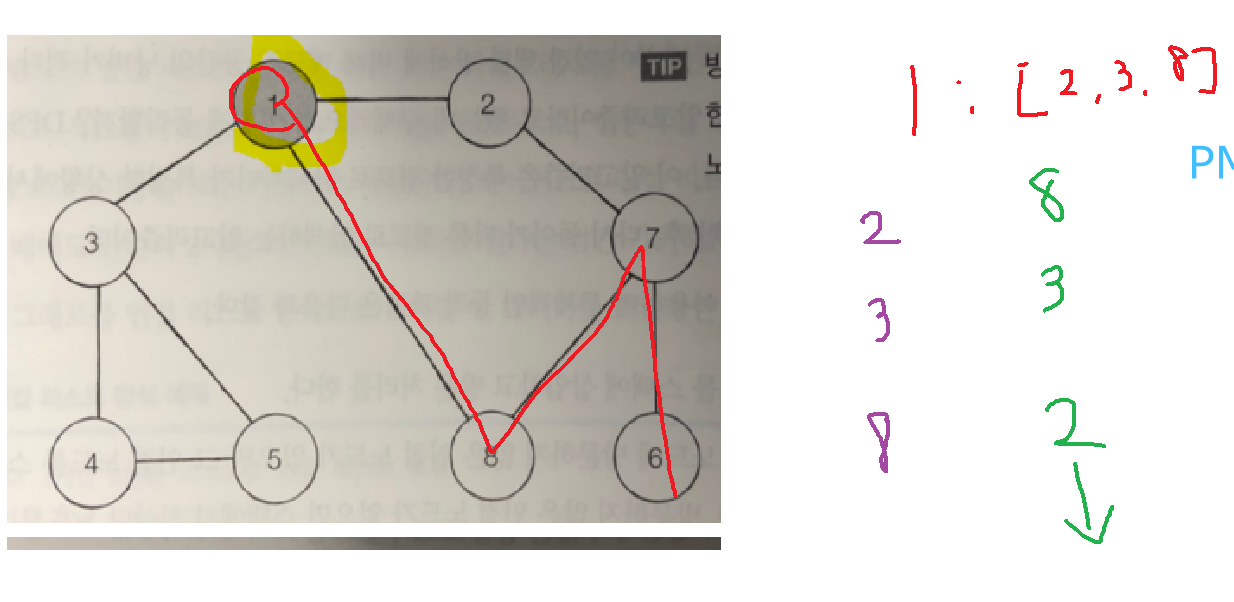

In [ ]:
# ==> 의도는 1 -> 2-> 7 .... 이런 순으로 해야하는데,,
#     실행   1 -> 8-> 7 .........

In [ ]:
def dfs_m2( graph, start):
    need_visit = list()
    visited    = list()
    need_visit.append( start )

    while need_visit:
        node = need_visit.pop()
        if node not in visited: # <--- 신규 방문지 체크
            visited.append(node)
            ####### 순서를 지정 : 같은 조건이면 작은 번호를 먼저 방문해라!!
            #       역방향: .reverse(),reversed(),[::-1]
            #       ++ 정렬을 해야할 수도 .. 문제에 따라서
            temp = graph[node]
            temp_reverse = list(reversed(temp))
            #######
            need_visit.extend( graph[node])
    return visited

In [ ]:
dfs_m2(graph_list, 1)

[1, 8, 7, 6, 2, 3, 5, 4]